In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
x= df.iloc[:,3:13]
y=df.iloc[:,13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

some features are categorical features so we will convert them into dummy features. 

In [8]:
geography= pd.get_dummies(x["Geography"],drop_first=True)

In [9]:
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [15]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [16]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


Concatenate the dataframes

In [10]:
x= pd.concat([x,geography,gender],axis=1)

Dropping unnecessary columns 

In [11]:
x= x.drop(['Geography','Gender'], axis=1)

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Splitting the dataset into training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state=0)

Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc= StandardScaler()

In [19]:
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

**ANN**

In [20]:
import keras 

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Initialising the ANN

In [23]:
classifier= Sequential()

Adding the input layer and the first hidden layer

In [24]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

Adding second hidden layer

In [25]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

Adding the output layer

In [26]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

Compiling ANN

In [27]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

Fitting the ANN to the Training set

In [29]:
model_history= classifier.fit(x_train, y_train, validation_split=0.33, batch_size= 10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5204 - accuracy: 0.7658 - val_loss: 0.4586 - val_accuracy: 0.7997
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.8112 - val_loss: 0.4356 - val_accuracy: 0.8016
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8166 - val_loss: 0.4260 - val_accuracy: 0.8092
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4051 - accuracy: 0.8227 - val_loss: 0.4120 - val_accuracy: 0.8156
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3944 - accuracy: 0.8293 - val_loss: 0.4046 - val_accuracy: 0.8220
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3848 - accuracy: 0.8350 - val_loss: 0.3969 - val_accuracy: 0.8277
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8405 - val_loss: 0.3918 - val_accuracy: 0.8285

List all data in history

In [30]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Summarize the history  by accuracy

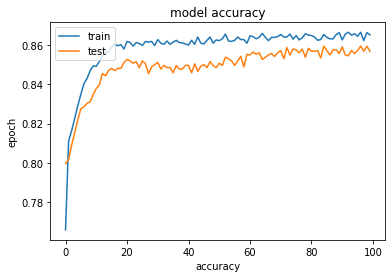

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

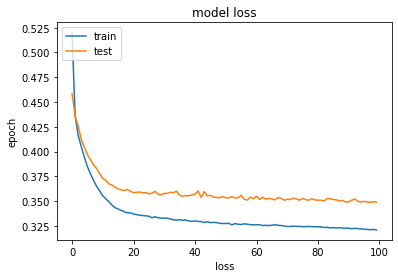

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Making the model

In [42]:
y_pred= classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


Making the confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm= confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1508,   87],
       [ 190,  215]])

Calculating the accuracy

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
score= accuracy_score(y_pred, y_test)

In [37]:
score

0.8615